In [73]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

import os
import numpy as np
import cv2
import mediapipe as mp

In [74]:
# img=image.load_img(r"C:\Users\dell g3\Desktop\PBL-II\dataset\training\play\play_0_344.png")

In [75]:
# plt.imshow(img)

In [76]:
# cv2.imread(r"C:\Users\dell g3\Desktop\PBL-II\dataset\training\play\play_0_344/.png").shape

In [77]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [78]:
train_dataset=train.flow_from_directory(r"C:\prishapbl\PBL-II\dataset\training",target_size=(200,200),batch_size=3,class_mode='binary')
validation_dataset=validation.flow_from_directory(r"C:\prishapbl\PBL-II\dataset\validation",target_size=(200,200),batch_size=3,class_mode='binary')

Found 185 images belonging to 2 classes.
Found 38 images belonging to 2 classes.


In [79]:
train_dataset.class_indices
validation_dataset.class_indices

{'pause': 0, 'play': 1}

In [80]:
pause_class_index = train_dataset.class_indices['pause']
play_class_index = train_dataset.class_indices['play']

total_pause_images = np.sum(np.array(train_dataset.classes) == pause_class_index)
total_play_images = np.sum(np.array(train_dataset.classes) == play_class_index)

# Define class weights
class_weights = {
    pause_class_index: 1.0,
    play_class_index: total_pause_images / total_play_images
}
print("Total Pause Images:", total_pause_images)
print("Total Play Images:", total_play_images)
print("Class Weights:", class_weights)

Total Pause Images: 134
Total Play Images: 51
Class Weights: {0: 1.0, 1: 2.627450980392157}


In [81]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [82]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  # tf.keras.layers.BatchNormalization(),
                                 tf.keras.layers.MaxPool2D(2,2),
                                  
                                 tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  # tf.keras.layers.BatchNormalization(),
                                  
                                 tf.keras.layers.MaxPool2D(2,2),
                                  
                                 tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  # tf.keras.layers.BatchNormalization(),
                                 tf.keras.layers.MaxPool2D(2,2),
                                  
                                 tf.keras.layers.Flatten(),
                                  
                                 tf.keras.layers.Dropout(0.5),
                                 tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
                                 tf.keras.layers.Dropout(0.5),
                                  
                                 # tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
                                 # tf.keras.layers.Dropout(0.5),
                                 tf.keras.layers.Dense(1,activation='sigmoid')])


In [83]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [84]:
history=model.fit(train_dataset,steps_per_epoch=3,epochs=20,validation_data=validation_dataset,class_weight=class_weights)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 880ms/step - accuracy: 0.0556 - loss: 1.4210 - val_accuracy: 0.5526 - val_loss: 1.2127
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step - accuracy: 0.3611 - loss: 2.0401 - val_accuracy: 0.5789 - val_loss: 1.1896
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step - accuracy: 0.3333 - loss: 2.0755 - val_accuracy: 0.5000 - val_loss: 1.1546
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step - accuracy: 0.3542 - loss: 1.7865 - val_accuracy: 0.3684 - val_loss: 1.1306
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step - accuracy: 0.4861 - loss: 1.1717 - val_accuracy: 0.4737 - val_loss: 1.1194
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 496ms/step - accuracy: 0.5139 - loss: 1.4315 - val_accuracy: 0.4474 - val_loss: 1.1099
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 494ms/step - accuracy: 0.4583 - loss: 1.6791 - val_accuracy: 0.4474 - val_loss: 1.0991
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 478ms/step - accuracy: 0.3889 - loss: 1.3179 - val_accuracy: 0.4211 - val_loss:

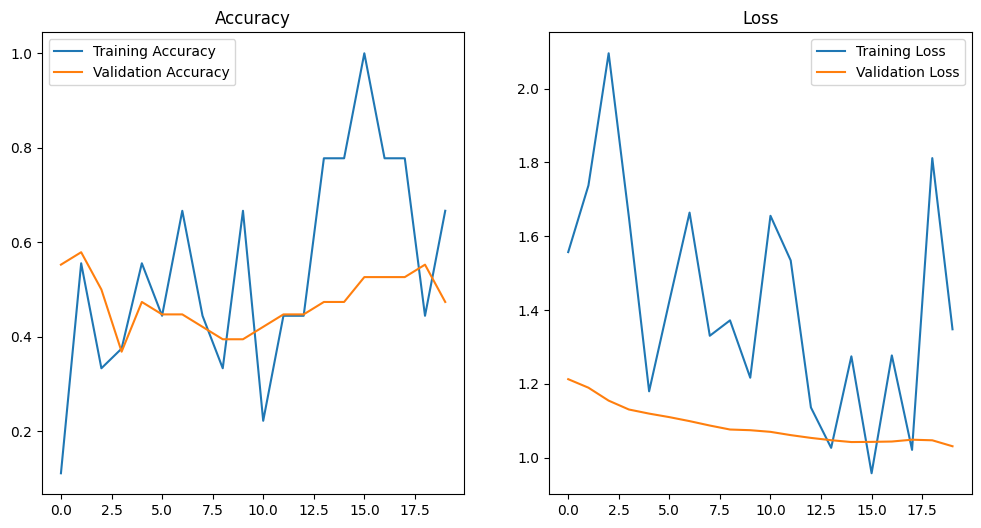

In [88]:
number=20
epochs_range=range(number)
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()


plt.show()

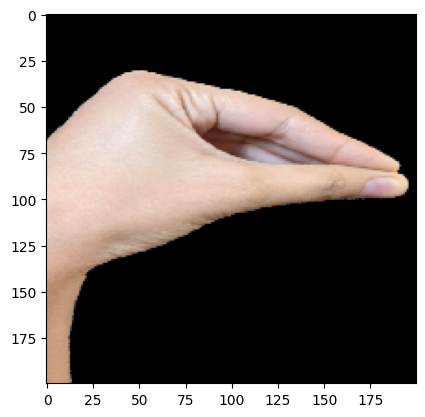

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
pause


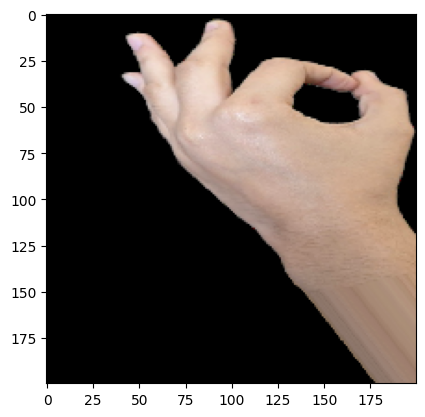

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
pause


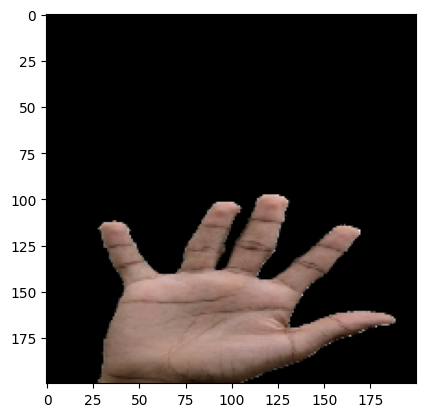

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
pause


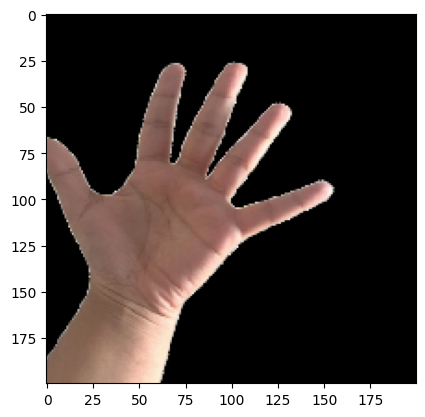

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
pause


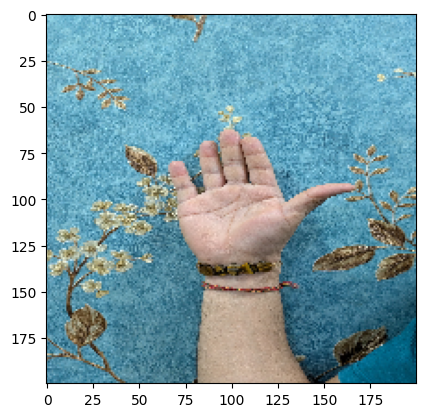

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
pause


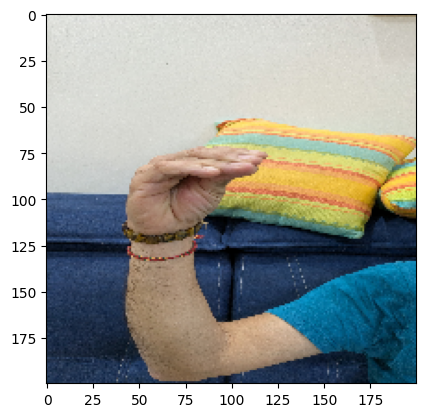

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
pause


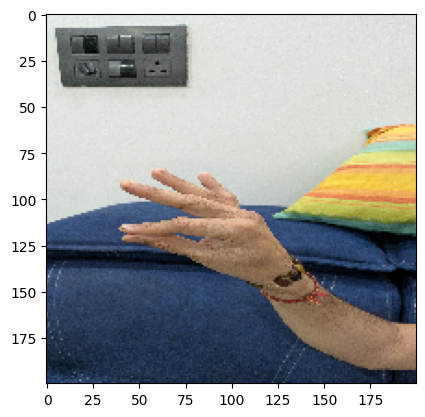

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
pause


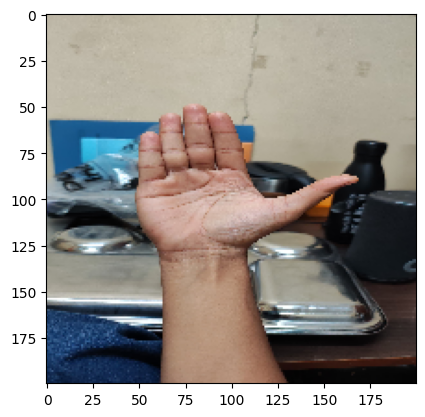

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
pause


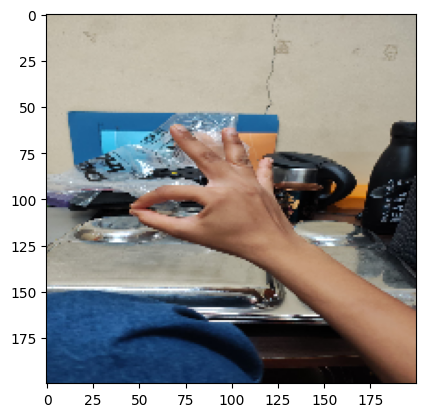

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
pause


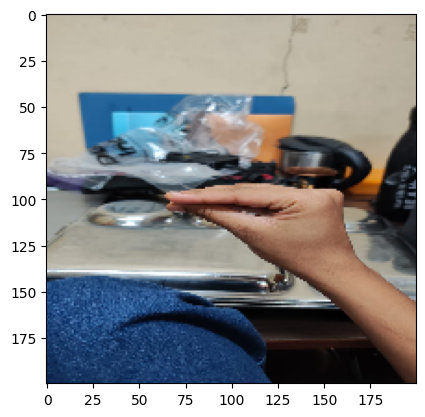

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
pause


In [89]:
dir_path=r"C:\prishapbl\PBL-II\dataset\test"
for i in os.listdir(dir_path):
    img=image.load_img(dir_path+"//"+i,target_size=(200,200,3))
    plt.imshow(img)
    plt.show()
    X=image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    
    val=model.predict(images)
    if val[0][0]<0.5:
        print('pause')
    else:
        print('play')